# 参数设置

In [1]:
# 数据集文件夹名
wine.dataset.folder <- "datasets"

# 图像文件夹名
figure.folder <- "figures"

# 模型结果文件夹名
model.summary.folder <- "model-summary"

# 数据集名称
red.wine.filename <- "winequality-red.csv"

# 分割线
seperation.line <- "-------------------------------------------------------------------------\n"

# 加载 packages
library(ggplot2)
library(xtable)
#library(ncvTest)

# 描述性统计

In [2]:
# 读取红酒数据
red.wine.path <- file.path(wine.dataset.folder, red.wine.filename)
red.wine <- read.csv(red.wine.path,sep = ";")

#red.wine.summary <- xtable(summary(red.wine))
#print(xtable(summary(red.wine[,9:12])))

## 因变量描述

In [3]:
# 获取频率直方图
frequency_table <- table(red.wine$quality)
red.wine.quality.frequency.figure.path <- file.path(figure.folder, "quality-frequency.png")

# 保存图像
png(filename = red.wine.quality.frequency.figure.path) 
barplot(frequency_table, main = "Frequency of quality", xlab = "Quality", ylab = "Frequency")
dev.off()

png 
  2

## 自变量描述

In [4]:
distribution.and.boxplot <- function(col){
    figure.path <- file.path(figure.folder, paste0(col, "-plot.png"))
    frequency_table <- table(red.wine[[col]])
    png(filename = figure.path, width = 800)
    par(mfrow = c(1, 2))
    barplot(frequency_table, main = paste0("Frequency of ", col), xlab = col, ylab = "Frequency")
    boxplot(red.wine[[col]] ~ red.wine$quality,
    
            main = paste0("Box plot of ", col, " by quality"),
            ylab = col, xlab = "Quality")
    dev.off()
}

# 绘制所有特征的分布图和箱线图
for(col in names(red.wine)){
    if(col != "quality"){
        distribution.and.boxplot(col)
    }
}

# 模型拟合

In [5]:
save_red_wine_model_summary <- function(model, file_name) {
  # 创建完整文件路径
  file_path <- file.path(model.summary.folder, paste0(file_name, ".txt"))

  # 将summary输出捕获到字符向量
  summary_text <- capture.output(summary(model))

  # 将summary输出写入txt文件
  writeLines(summary_text, file_path)

  cat("Model summary saved to:", file_path, "\n")
}

### 线性回归全模型

Model summary saved to: model-summary/linear_model.txt 


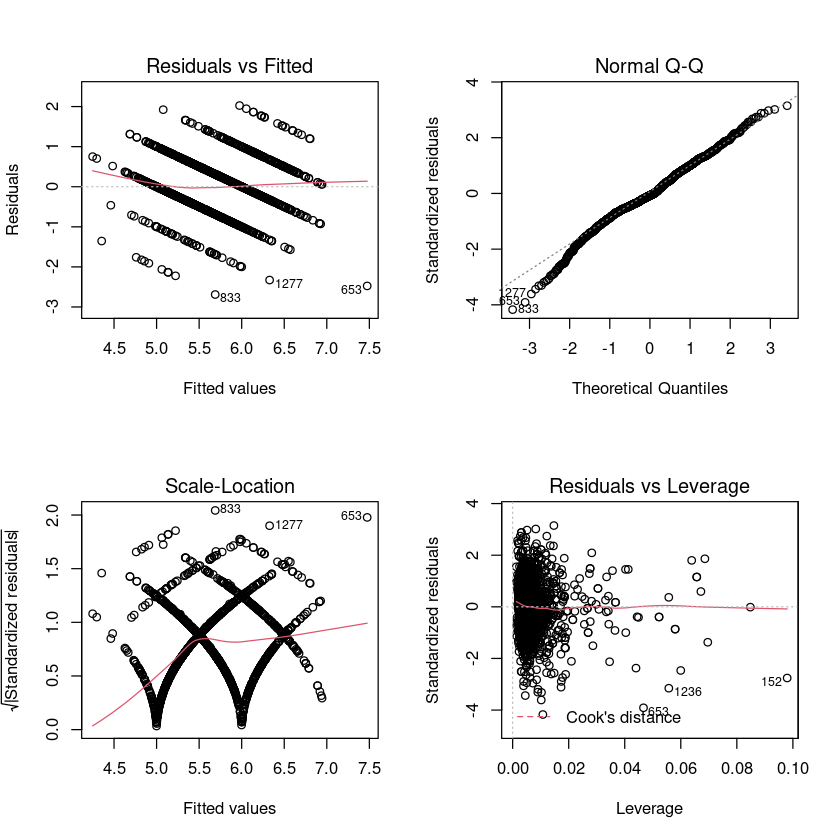

In [6]:
linear.model <- lm(quality ~ ., data = red.wine)
#print(xtable(summary(linear.model)))
save_red_wine_model_summary(linear.model, "linear_model")
par(mfrow = c(2, 2))
plot(linear.model)

#### 模型检验

In [7]:
#ncvTest()

## 人工构造特征

Model summary saved to: model-summary/augmented_linear_model.txt 


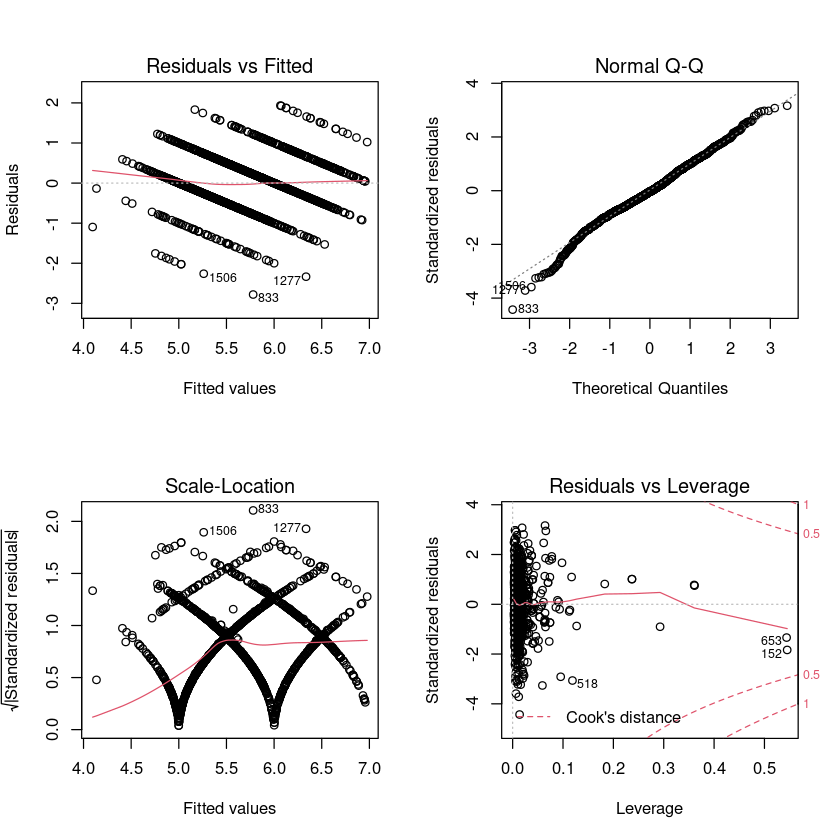

In [8]:
red.wine$sulphates.square <- (red.wine$sulphates)^2
red.wine$sulphates.cube <- (red.wine$sulphates)^3
red.wine$sulphates.ln <- log(red.wine$sulphates)
#red.wine$sulphates.inv.ln <- 1 / log(red.wine$sulphates)
red.wine$alcohol.square <- (red.wine$alcohol)^2
red.wine$alcohol.cube <- (red.wine$alcohol)^3
red.wine$alcohol.ln <- log(red.wine$alcohol)
#red.wine$alcohol.inv.ln <- 1 / log(red.wine$alcohol)
red.wine$pH.square <- (red.wine$pH)^2
red.wine$pH.cube <- (red.wine$pH)^3
red.wine$pH.ln <- log(red.wine$pH)
#red.wine$pH.inv.ln <- 1 / log(red.wine$pH)
augmented.linear.model <- lm(quality ~ ., data = red.wine)
#print(xtable(summary(augmented.linear.model)))
save_red_wine_model_summary(augmented.linear.model, "augmented_linear_model")
par(mfrow = c(2, 2))
plot(augmented.linear.model)